### Setup and imports

In [16]:
%load_ext autoreload
%autoreload 2
# standard import
import matplotlib.pyplot as plt
import numpy as np
import torch
from task import PolygonDataset, plot_and_iou, PolygonModel, check_model_size

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
idx = 12
train_ds = PolygonDataset("data/train.pkl")
train_ds[idx]
for idx in range(2):
    img, gt = train_ds[idx][0], train_ds[idx][1]
    print(len(gt)//2)

4
4


(128, 128) [ 77.25835692  15.78987687  36.4269244   22.28998319  24.83821842
  32.91375121  41.19504204 108.49644809]


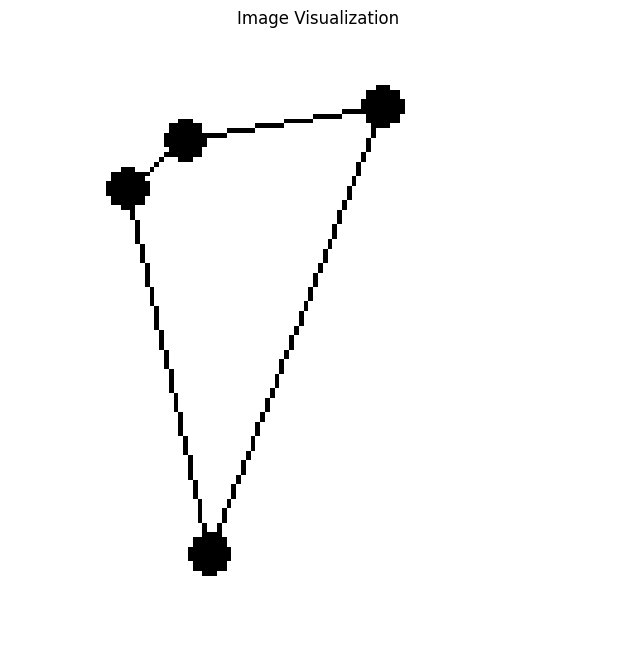

In [3]:
img, gt = train_ds[idx][0], train_ds[idx][1]
print(img.shape, gt)
plt.figure(figsize=(8, 8))
plt.imshow(train_ds[idx][0], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Hide axes
plt.title('Image Visualization')
plt.show()

/tmp/ipykernel_245220/4156859821.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gt = torch.tensor(gt).reshape(-1, 2)


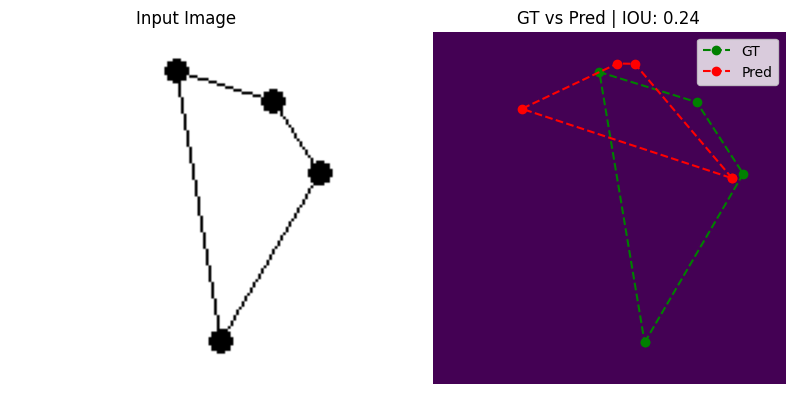

0.24330908641103147

In [26]:
gt = torch.tensor(gt).reshape(-1, 2)
dummy_pred = pred = torch.tensor(np.array([
    108.31464192, 52.74978227,   # (113+5, 55-3)
     72.94262727, 11.15568548,   # (67+5, 14-3)
     66.63285050, 11.05606540,   # (61+5, 14-3)
     31.87799095, 27.50438171    # (26+5, 30-3)
])).reshape(-1, 2)
plot_and_iou(torch.tensor(img), dummy_pred, gt, save_path="./")

In [45]:
# Initialize the model
model = PolygonModel()

# Create a dummy image tensor (batch_size=1, channels=3, height=224, width=224)
dummy_image = torch.randn(1, 1, 128, 128)

# Perform inference
with torch.no_grad():  # Disable gradient computation for inference
    pred_coords, pred_exists = model(dummy_image)

# Inference
print("pred_coords", pred_coords)
print("pred_exists", pred_exists)
print(f"Num parameters: {check_model_size(model)}")

pred_coords tensor([[[-1.1308e+00, -4.9815e-01],
         [-1.1464e+00, -6.6260e-04],
         [-1.0798e+00,  1.5658e-01],
         [-7.6759e-01, -1.0012e-02]]])
pred_exists tensor([[[-0.1225],
         [ 0.0094],
         [-0.3651],
         [-0.1808]]])
Num parameters: 4.825353
